In [1]:
import csv 
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import patsy
from scipy.stats import chi2 # for sig testing
from IPython.display import display, HTML # for pretty printing


In [2]:
dat=pd.read_csv('NBA_Data.csv')
dat=dat.dropna()
dat.head()

,Player,College,HT,WT,Pos,NBA_ppg,NBA_g_played,NCAA_ppg,NCAA_games,Year of All-star selection,Team,Selection Type,NBA Draft Status,Nationality,Is All-Star
0,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2015,Atlanta Hawks,Eastern All-Star Replacement Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,True
1,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2014,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,True
2,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2010,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,True
3,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2009,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,True
4,Allan Houston,University of Tennessee,6-6,200.0,G,17.3,839,21.9,128.0,2000,New York Knicks,Eastern All-Star Coaches Selection,1993 Rnd 1 Pick 11,United States,True


In [3]:
dat=dat.drop(["Is All-Star"],axis=1)

In [4]:
mlm_mod = sm.MixedLM.from_formula(
    formula = 'NBA_ppg ~ NBA_g_played *NCAA_ppg*NCAA_games', 
    groups = 'College', 
    re_formula="0 + NCAA_ppg",
    data=dat
)


In [5]:
mlm_result = mlm_mod.fit()

# Print out the summary of the fit
mlm_result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                    MixedLM       Dependent Variable:       NBA_ppg  
No. Observations:         320           Method:                   REML     
No. Groups:               58            Scale:                    6.3129   
Min. group size:          1             Likelihood:               -843.6469
Max. group size:          24            Converged:                Yes      
Mean group size:          5.5                                              
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        22.346   10.808  2.068 0.039  1.163 43.528
NBA_g_played                     -0.010    0.014 -0.757 0.449 -0.038  0.017
NCAA_ppg                         -0.073    0.704 -0.104 0.917 -1.453  1.306
NBA_g_played:NCAA_ppg             0.001    0.001  0.574 0.566 -0.001  0.002
NCAA_games                       -0.071    0.115 -0.614 0.539 -0.297  0.155
NBA_g_played:NCAA_games          -0.000    0.000 -0.056 0.955 -0.000  0.000
NCAA_ppg:NCAA_games              -0.001    0.008 -0.180 0.857 -0.016  0.013
NBA_g_played:NCAA_ppg:NCAA_games  0.000    0.000  0.537 0.592 -0.000  0.000
NCAA_ppg Var                      0.035    0.004                           
===========================================================================

"""

In [6]:
dat["NCAA_ppg_dev"] = dat.groupby("College")["NCAA_ppg"].transform(lambda x: x - x.mean())

# Print out the head of the dataset to see the centered measure
dat.head()

,Player,College,HT,WT,Pos,NBA_ppg,NBA_g_played,NCAA_ppg,NCAA_games,Year of All-star selection,Team,Selection Type,NBA Draft Status,Nationality,NCAA_ppg_dev
0,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2015,Atlanta Hawks,Eastern All-Star Replacement Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,-0.3
1,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2014,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,-0.3
2,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2010,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,-0.3
3,Al Horford,University of Florida,6-10,245.0,C-F,14.2,717,10.3,109.0,2009,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States,-0.3
4,Allan Houston,University of Tennessee,6-6,200.0,G,17.3,839,21.9,128.0,2000,New York Knicks,Eastern All-Star Coaches Selection,1993 Rnd 1 Pick 11,United States,0.0


In [7]:
mlm_mod = sm.MixedLM.from_formula(
    formula = 'NBA_ppg ~ NBA_g_played * NCAA_ppg_dev*WT', 
    groups = 'College', 
    re_formula="0 + NCAA_ppg",
    data=dat
)

In [8]:
mlm_result = mlm_mod.fit()

# Print out the summary of the fit
mlm_result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
=======================================================================
Model:                  MixedLM      Dependent Variable:      NBA_ppg  
No. Observations:       320          Method:                  REML     
No. Groups:             58           Scale:                   6.2251   
Min. group size:        1            Likelihood:              -855.2084
Max. group size:        24           Converged:               Yes      
Mean group size:        5.5                                            
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     6.968    5.225  1.334 0.182 -3.272 17.209
NBA_g_played                  0.017    0.006  2.947 0.003  0.006  0.029
NCAA_ppg_dev                 -3.364    2.386 -1.410 0.159 -8.041  1.313
NBA_g_played:NCAA_ppg_dev     0.007    0.003  2.332 0.020  0.001  0.013
WT                            0.026    0.024  1.112 0.266 -0.020  0.073
NBA_g_played:WT              -0.000    0.000 -2.250 0.024 -0.000 -0.000
NCAA_ppg_dev:WT               0.015    0.010  1.471 0.141 -0.005  0.034
NBA_g_played:NCAA_ppg_dev:WT -0.000    0.000 -2.164 0.030 -0.000 -0.000
NCAA_ppg Var                  0.065    0.007                           
=======================================================================

"""

In [9]:
model1 = sm.OLS.from_formula("NBA_ppg ~ NBA_g_played * C(NCAA_ppg_dev)* WT",
           data=dat)
result1 = model1.fit()

# Fit a marginal linear model using GEE to handle dependent data
model2 = sm.GEE.from_formula("NBA_ppg ~ NBA_g_played * C(NCAA_ppg_dev)* WT",
           groups="College",
           cov_struct=sm.cov_struct.Exchangeable(), data=dat)
result2 = model2.fit()

x = pd.DataFrame({"OLS_params": result1.params, "OLS_SE": result1.bse,
                  "GEE_params": result2.params, "GEE_SE": result2.bse})
x = x[["OLS_params", "OLS_SE", "GEE_params", "GEE_SE"]]
print(x)

                                                      OLS_params  \
Intercept                                           2.466218e+01   
C(NCAA_ppg_dev)[T.-8.28125]                        -1.457960e-09   
C(NCAA_ppg_dev)[T.-8.162499999999993]              -2.002200e-09   
C(NCAA_ppg_dev)[T.-7.569230769230771]               5.611403e-09   
C(NCAA_ppg_dev)[T.-6.194736842105262]               6.459811e-09   
...                                                          ...   
NBA_g_played:C(NCAA_ppg_dev)[T.4.73076923076923...  9.169155e-05   
NBA_g_played:C(NCAA_ppg_dev)[T.5.30526315789473...  6.022118e-05   
NBA_g_played:C(NCAA_ppg_dev)[T.5.42500000000000...  4.078700e-05   
NBA_g_played:C(NCAA_ppg_dev)[T.5.53846153846153...  5.282385e-05   
NBA_g_played:C(NCAA_ppg_dev)[T.10.3333333333333...  6.478936e-05   

                                                          OLS_SE  \
Intercept                                           3.642942e+00   
C(NCAA_ppg_dev)[T.-8.28125]                    

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_estimating_equations.py:1317: IterationLimitWarning: Iteration limit reached prior to convergence
  IterationLimitWarning)
C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_estimating_equations.py:1827: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_robust))


In [29]:
#NBA games played
arr=np.arange(1,len(dat["NBA_g_played"])+1)
mean=np.mean(dat["NBA_g_played"])
print(mean)
dis=[np.linalg.norm(a-mean) for a in dat["NBA_g_played"]]
dis

903.571875


[186.57187499999998,
 186.57187499999998,
 186.57187499999998,
 186.57187499999998,
 64.57187499999998,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 10.428125000000023,
 65.57187499999998,
 65.57187499999998,
 440.571875,
 136.42812500000002,
 179.42812500000002,
 179.42812500000002,
 495.571875,
 495.571875,
 495.571875,
 495.571875,
 21.571874999999977,
 10.571874999999977,
 10.571874999999977,
 0.5718749999999773,
 111.42812500000002,
 68.57187499999998,
 68.57187499999998,
 374.571875,
 374.571875,
 374.571875,
 374.571875,
 374.571875,
 35.57187499999998,
 35.57187499999998,
 577.571875,
 577.571875,
 577.571875,
 269.571875,
 42.57187499999998,
 42.57187499999998,
 148.42812500000002,
 148.42812500000002,
 148.42812500000002,
 148.42812500000002,
 148.42812500000002,
 148.42812500000002,
 148.42812500000002,
 148.42812500000002,
 148.428

In [30]:
df=pd.DataFrame(dis,index=arr)
df.idxmin()

0    29
dtype: int64

In [63]:
from sklearn.cluster import KMeans
ppgwt=np.column_stack((dat["NBA_g_played"],dat["NBA_ppg"]))
kmres=KMeans(n_clusters=5).fit(ppgwt)

Text(0, 0.5, 'Points per game')

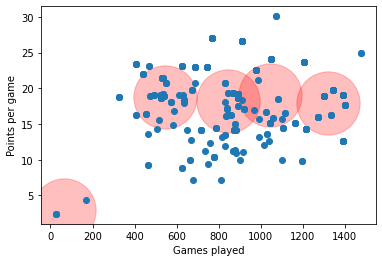

In [65]:
col=kmres.cluster_centers_
plt.scatter(col[:,0],col[:,1],s=4009,color="red",alpha=0.25)
plt.scatter(dat["NBA_g_played"],dat["NBA_ppg"])
plt.xlabel("Games played")
plt.ylabel("Points per game")

In [38]:
#NCAA ppg
arr=np.arange(1,len(dat["NCAA_ppg"])+1)
mean=np.mean(dat["NCAA_ppg"])
print(mean)
dis=[np.linalg.norm(a-mean) for a in dat["NCAA_ppg"]]
dis


16.372500000000013


[6.072500000000012,
 6.072500000000012,
 6.072500000000012,
 6.072500000000012,
 5.527499999999986,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 6.627499999999987,
 0.32749999999998636,
 0.32749999999998636,
 6.372500000000013,
 6.772500000000013,
 2.627499999999987,
 2.627499999999987,
 2.1725000000000136,
 2.1725000000000136,
 2.1725000000000136,
 2.1725000000000136,
 2.3274999999999864,
 4.672500000000014,
 4.672500000000014,
 7.172500000000014,
 3.572500000000012,
 2.7725000000000133,
 2.7725000000000133,
 2.427499999999988,
 2.427499999999988,
 2.427499999999988,
 2.427499999999988,
 2.427499999999988,
 4.372500000000013,
 4.372500000000013,
 2.072500000000012,
 2.072500000000012,
 2.072500000000012,
 0.37250000000001293,
 1.4725000000000126,
 1.4725000000000126,
 5.827499999999986,
 5.827499999999986,
 5.827499999999986,
 5.827499999999986,
 5.82

In [49]:
df=pd.DataFrame(dis,index=arr)
df.idxmin()

0    141
dtype: int64

In [66]:
from sklearn.cluster import KMeans
ppgwt=np.column_stack((dat["NCAA_ppg"],dat["NBA_ppg"]))
kmres2=KMeans(n_clusters=5).fit(ppgwt)

[[16.55772358 19.39268293]
 [10.89259259  9.04074074]
 [21.8765625  24.4671875 ]
 [10.69142857 17.2       ]
 [15.97464789 14.65915493]]


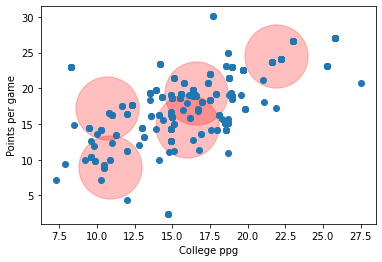

In [75]:
col2=kmres2.cluster_centers_
plt.scatter(col2[:,0],col2[:,1],s=4005,color="red",alpha=0.25)
plt.scatter(dat["NCAA_ppg"],dat["NBA_ppg"])
plt.xlabel("College ppg")
plt.ylabel("Points per game")
print(col2)

In [96]:
dat["col"]=kmres
dat["col2"]=kmres2
model2 = sm.GEE.from_formula("NBA_ppg ~ col * col2",
           groups="Team",
           cov_struct=sm.cov_struct.Exchangeable(), data=dat)
result2 = model2.fit()

print(result2.cov_struct.summary())

The correlation between two observations in the same cluster is 0.293


In [93]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               GEE Regression Results                              
===================================================================================
Dep. Variable:                     NBA_ppg   No. Observations:                  320
Model:                                 GEE   No. clusters:                       34
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                  24
Family:                           Gaussian   Mean cluster size:                 9.4
Dependence structure:         Exchangeable   Num. iterations:                     5
Date:                     Wed, 10 Jun 2020   Scale:                          22.073
Covariance type:                    robust   Time:                         11:50:28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1755      0.516     35.218      0.000      17.164      19.187
==============================================================================
Skew:                         -0.3412   Kurtosis:                       0.5766
Centered skew:                -0.8112   Centered kurtosis:              1.5462
==============================================================================
"""

In [94]:
model3 = sm.MixedLM.from_formula("NBA_ppg ~ col * col2",
           groups="Team", data=dat)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: NBA_ppg  
No. Observations: 320     Method:             REML     
No. Groups:       34      Scale:              15.2587  
Min. group size:  1       Likelihood:         -915.7650
Max. group size:  24      Converged:          Yes      
Mean group size:  9.4                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    18.171    0.524 34.669 0.000 17.143 19.198
Team Var      7.064    0.606                           
=======================================================

"""